In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Data Acqusition

In [ ]:
df=pd.read_csv('/content/HR_Analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

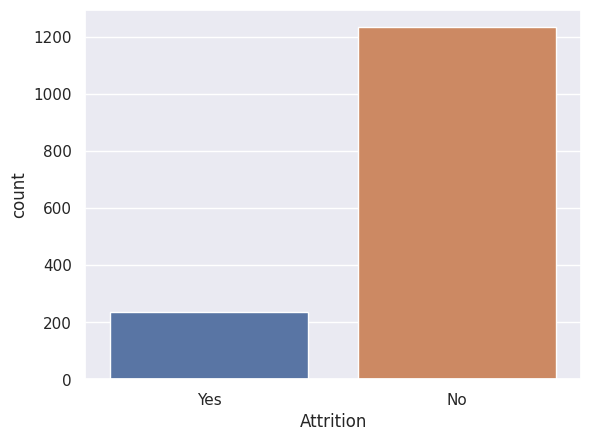

In [ ]:
import seaborn as sns
sns.countplot(x=df["Attrition"]);

##Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

####percentage for categorical

In [ ]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

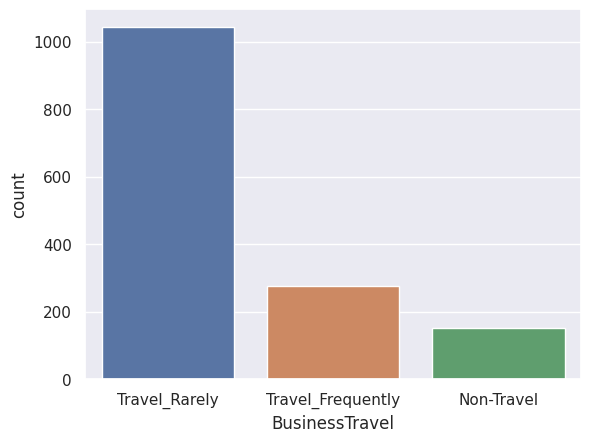

In [ ]:
sns.countplot(x=df['BusinessTravel']);

In [ ]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

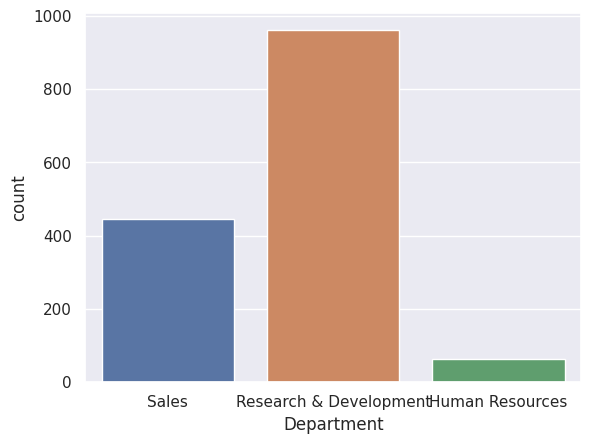

In [ ]:
sns.countplot(x=df['Department']);

In [ ]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

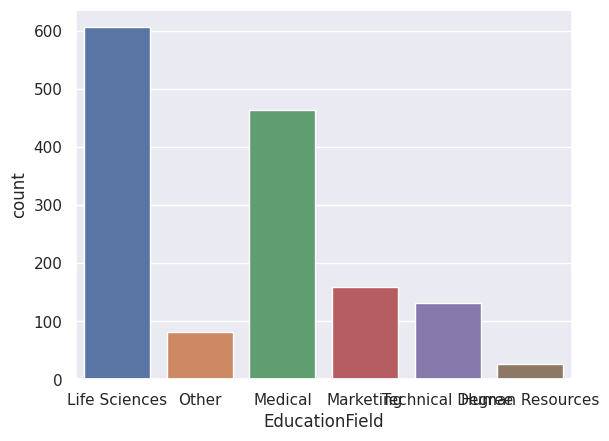

In [ ]:
sns.countplot(x=df['EducationField']);

In [ ]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

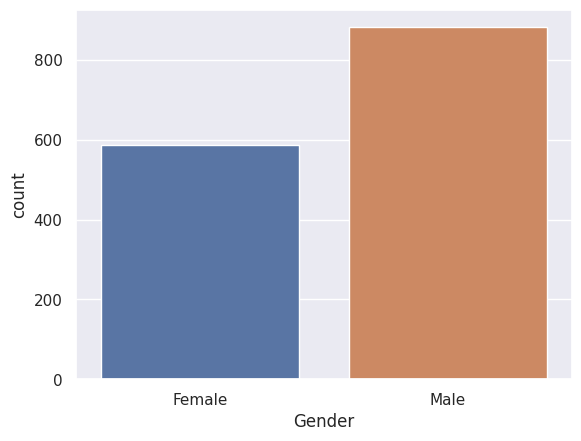

In [ ]:
sns.countplot(x=df['Gender']);

In [ ]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

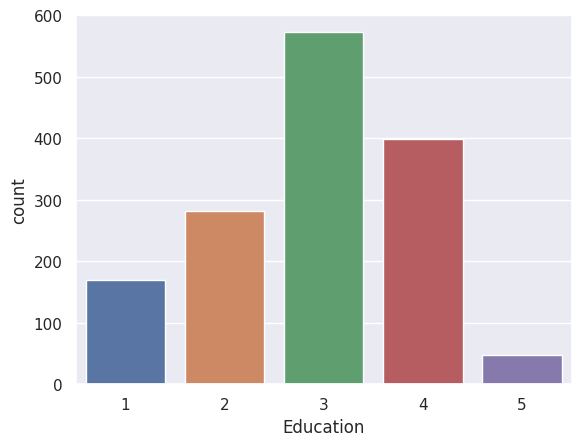

In [ ]:
sns.countplot(x=df['Education']);

In [ ]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

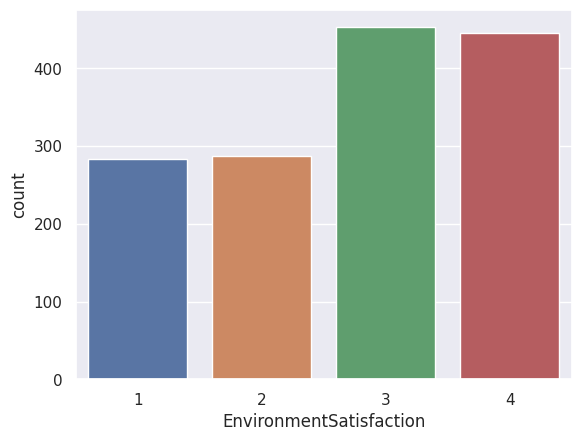

In [ ]:
sns.countplot(x=df['EnvironmentSatisfaction']);

In [ ]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

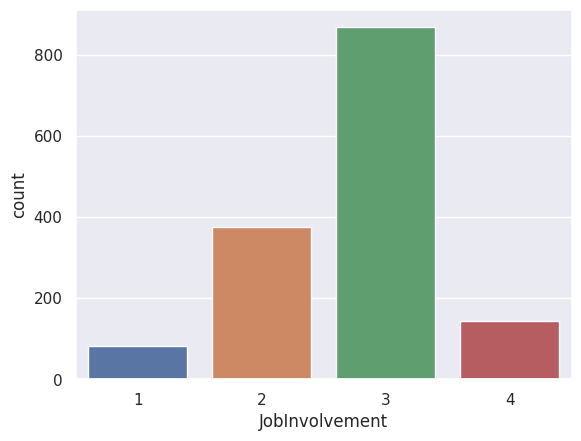

In [ ]:
sns.countplot(x=df['JobInvolvement']);

In [ ]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

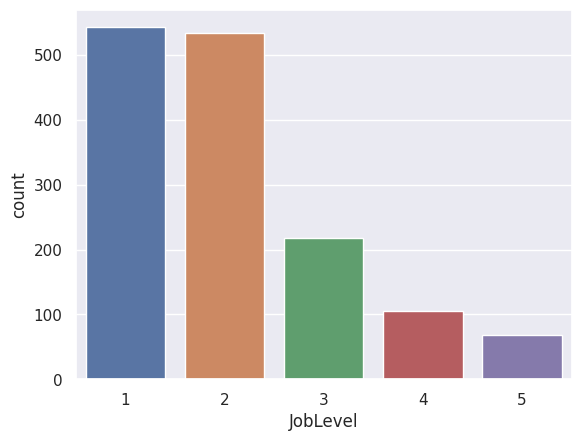

In [ ]:
sns.countplot(x=df['JobLevel']);

In [ ]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

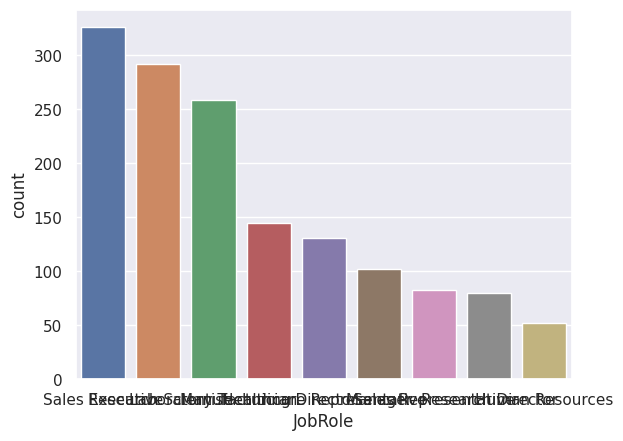

In [ ]:
sns.countplot(x=df['JobRole']);

In [ ]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

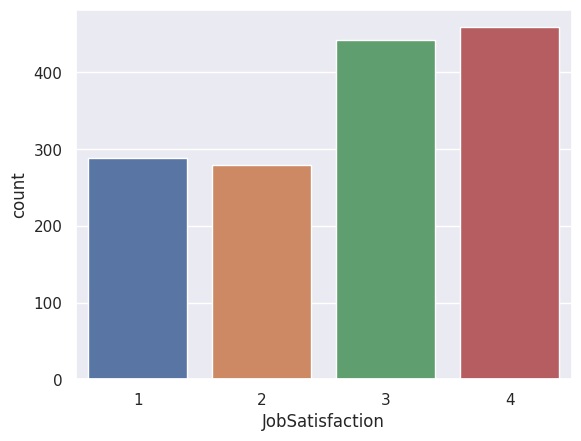

In [ ]:
sns.countplot(x=df['JobSatisfaction']);

In [ ]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

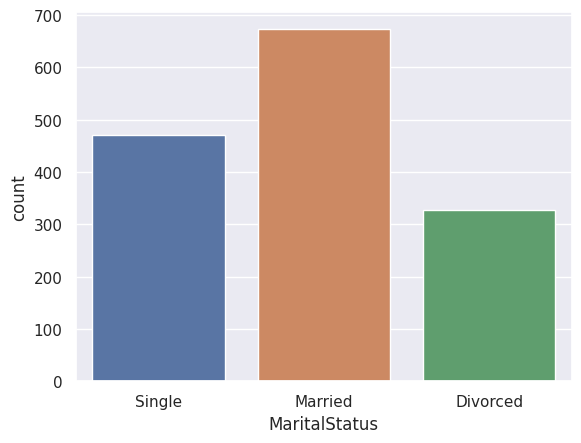

In [ ]:
sns.countplot(x=df['MaritalStatus']);

In [ ]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

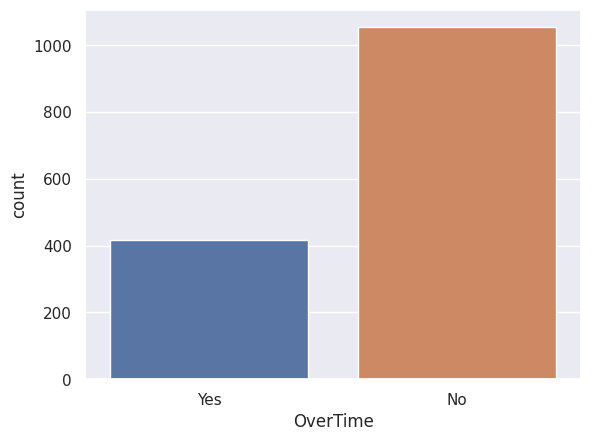

In [ ]:
sns.countplot(x=df['OverTime']);

In [ ]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

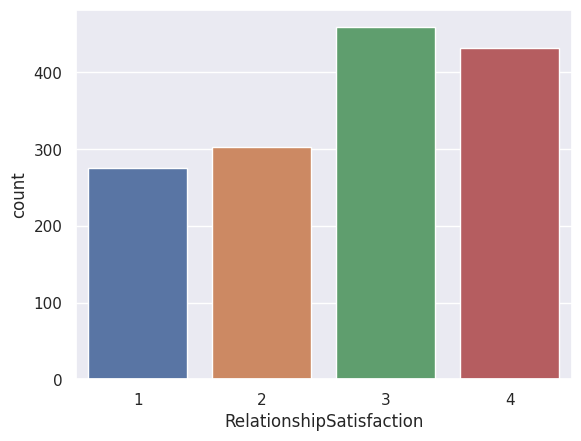

In [ ]:
sns.countplot(x=df['RelationshipSatisfaction']);

In [ ]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

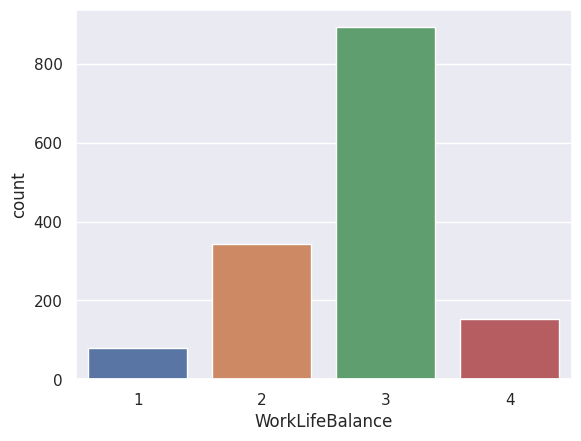

In [ ]:
sns.countplot(x=df['WorkLifeBalance']);

### Data Encoding


In [ ]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows
label_encoder  = preprocessing.LabelEncoder()
# Encode labels in column ' Attrition'.
df['Attrition']= label_encoder.fit_transform(df['Attrition'])
df['Attrition'].unique()

array([1, 0])

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition'].values

In [ ]:
X['BusinessTravel']= label_encoder.fit_transform(X['BusinessTravel'])

In [ ]:
X['Department']= label_encoder.fit_transform(X['Department'])

In [ ]:
X['EducationField']= label_encoder.fit_transform(X['EducationField'])

In [ ]:
X['Gender']= label_encoder.fit_transform(X['Gender'])

In [ ]:
X['Education']= label_encoder.fit_transform(X['Education'])

In [ ]:
X['EnvironmentSatisfaction']= label_encoder.fit_transform(X['EnvironmentSatisfaction'])

In [ ]:
X['JobInvolvement']= label_encoder.fit_transform(X['JobInvolvement'])

In [ ]:
X['JobLevel']= label_encoder.fit_transform(X['JobLevel'])

In [ ]:
X['JobRole']= label_encoder.fit_transform(X['JobRole'])

In [ ]:
X['JobSatisfaction']= label_encoder.fit_transform(X['JobSatisfaction'])

In [ ]:
X['MaritalStatus']= label_encoder.fit_transform(X['MaritalStatus'])

In [ ]:
X['Over18']= label_encoder.fit_transform(X['Over18'])

In [ ]:
X['OverTime']= label_encoder.fit_transform(X['OverTime'])

In [ ]:
X['RelationshipSatisfaction']= label_encoder.fit_transform(X['RelationshipSatisfaction'])

In [ ]:
X['WorkLifeBalance']= label_encoder.fit_transform(X['WorkLifeBalance'])

### descriptive Statistics for Numerical

In [ ]:
X[['Age','DailyRate','DistanceFromHome','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [ ]:
df.drop('EmployeeCount', axis=1, inplace=True)

In [ ]:
df.drop('StandardHours', axis=1, inplace=True)

###check Outliers

In [ ]:
df_new= X[['Age','DailyRate','DistanceFromHome','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

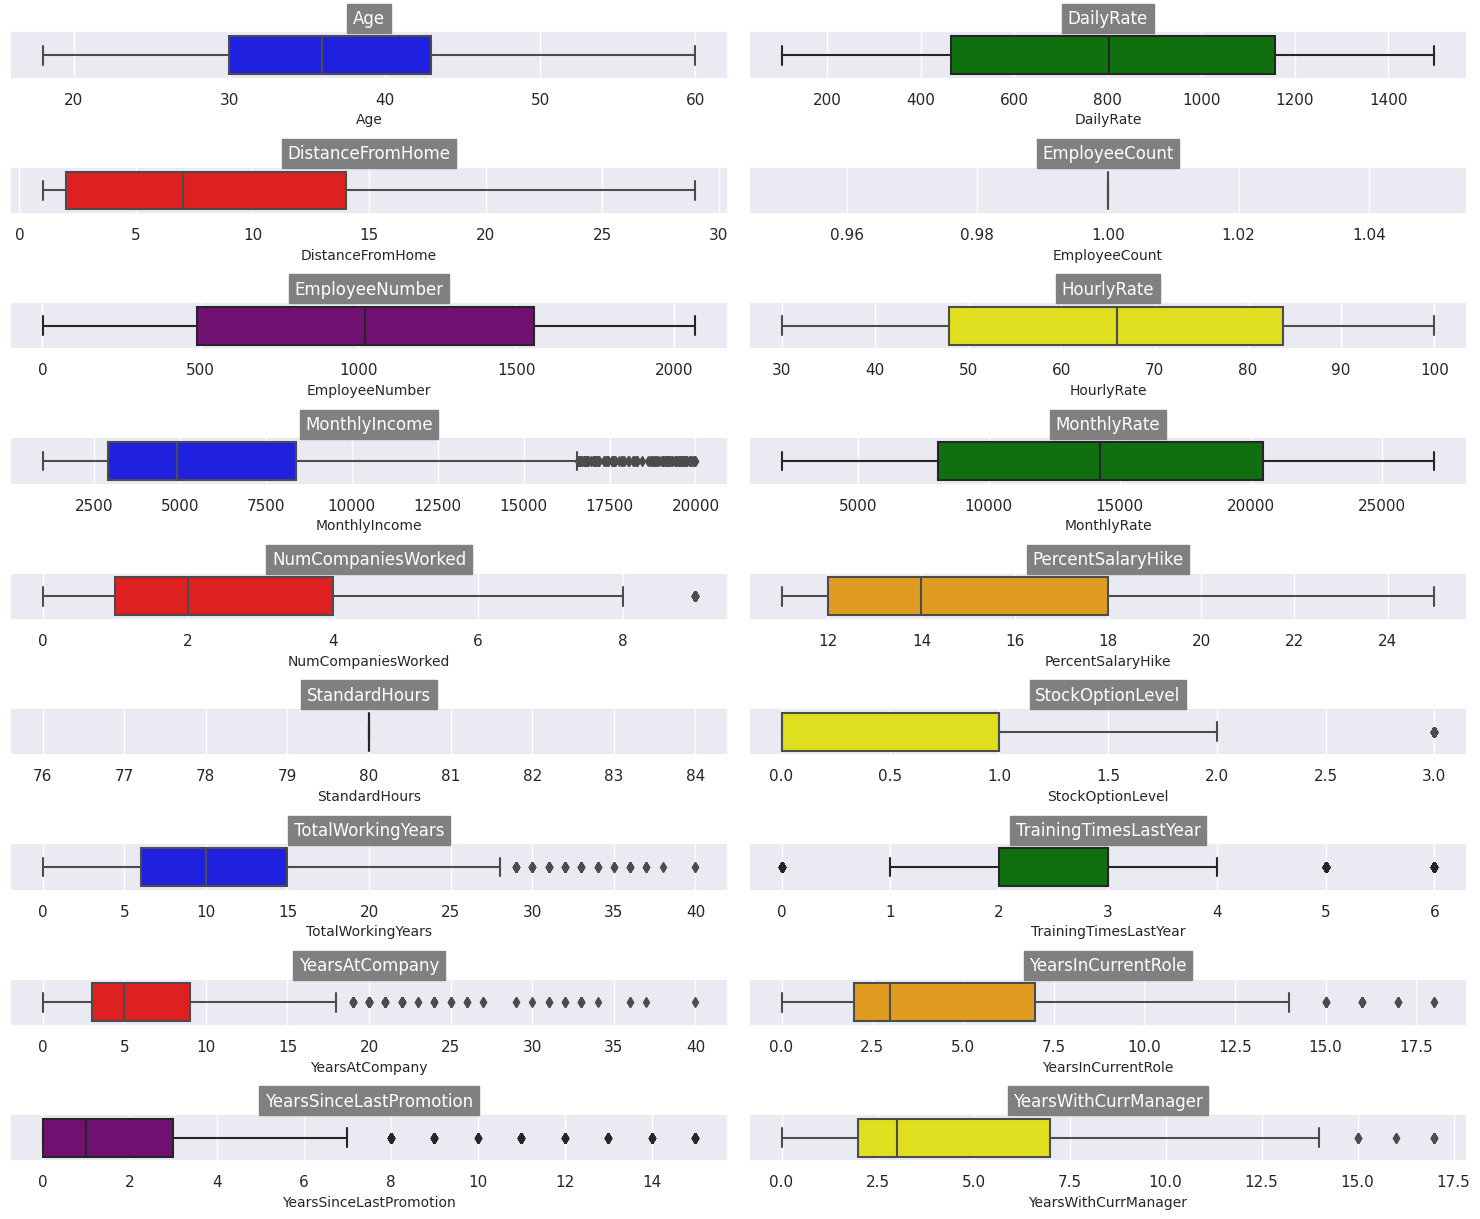

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)
numeric_cols = df_new.select_dtypes(['number']).columns

colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow']

num_subplots = len(numeric_cols)
num_rows = 15

for idx, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 2, idx % (num_rows * 2) + 1)
    sns.boxplot(x=col, data=df_new, color=colors[idx % len(colors)])
    plt.title(col, backgroundcolor='gray', color='white', fontsize=12)
    plt.xlabel(col, size=10)

plt.tight_layout()
plt.show()

##Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify = y, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1176, 34)
(294, 34)


##Over Sampling

Resampled dataset shape Counter({0: 986, 1: 493}) - Total Rows: 1479


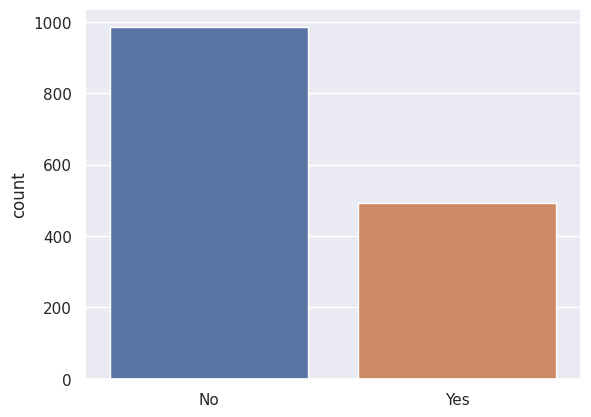

In [ ]:
# oversample minority class to contain
# half the amount of samples in the majority class
smote = SMOTE(sampling_strategy = 0.5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
ax = sns.countplot(x = y_smote, palette='deep');
ax.set_xticks(ticks=[1,0]);
ax.set_xticklabels(labels=['Yes', 'No']);
print('Resampled dataset shape %s' % Counter(y_smote), '- Total Rows:', len(y_smote))

## Scale the data

In [ ]:
# Fit the scaler on the training set and transform both training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

##Feature Selection

In [ ]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train);

MonthlyIncome               0.077009
Age                         0.059019
OverTime                    0.056818
EmployeeNumber              0.051245
MonthlyRate                 0.050132
DailyRate                   0.049716
HourlyRate                  0.047376
TotalWorkingYears           0.045892
DistanceFromHome            0.043632
YearsAtCompany              0.040148
NumCompaniesWorked          0.034738
PercentSalaryHike           0.032568
JobRole                     0.032194
YearsWithCurrManager        0.031729
StockOptionLevel            0.030551
YearsInCurrentRole          0.025902
EnvironmentSatisfaction     0.025737
TrainingTimesLastYear       0.025078
WorkLifeBalance             0.024822
RelationshipSatisfaction    0.024548
JobSatisfaction             0.024361
YearsSinceLastPromotion     0.023512
MaritalStatus               0.022929
EducationField              0.022118
JobInvolvement              0.021592
Education                   0.019817
JobLevel                    0.017781
B

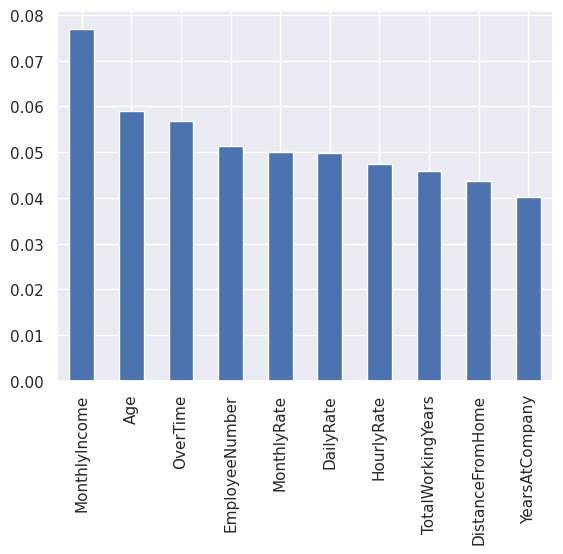

In [ ]:
importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(importance.sort_values(ascending=False))  # sorting in descending order
importance.nlargest(10).plot(kind='bar');

###using Correlation Matrix with Heatmap

In [ ]:
corrmat = df_new.corr()
corrmat

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,NaN,-0.010145,0.024287,0.497855,0.028051,0.299635,0.003634,NaN,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,NaN,-0.050990,0.023381,0.007707,-0.032182,0.038153,0.022704,NaN,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,NaN,0.032916,0.031131,-0.017014,0.027473,-0.029251,0.040235,NaN,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,NaN,1.000000,0.035179,-0.014829,0.012648,-0.001251,-0.012944,NaN,0.062227,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
HourlyRate,0.024287,0.023381,0.031131,NaN,0.035179,1.000000,-0.015794,-0.015297,0.022157,-0.009062,NaN,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.497855,0.007707,-0.017014,NaN,-0.014829,-0.015794,1.000000,0.034814,0.149515,-0.027269,NaN,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,NaN,0.012648,-0.015297,0.034814,1.000000,0.017521,-0.006429,NaN,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,NaN,-0.001251,0.022157,0.149515,0.017521,1.000000,-0.010238,NaN,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,NaN,-0.012944,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,NaN,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985


In [ ]:
f, ax = plt.subplots(figsize=[20, 15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="YlGnBu")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

##Model

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf_model.fit(X_train, y_train);

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf_y_pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294



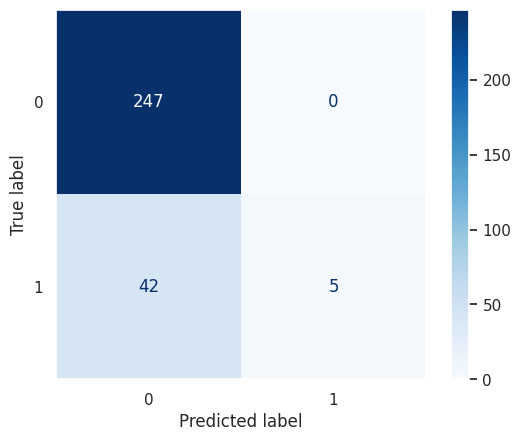

In [ ]:
print(classification_report(y_test, rf_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, cmap='Blues')
plt.grid(False)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_fscore = f1_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)


##Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dt_y_pred = dt_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       247
           1       0.33      0.36      0.35        47

    accuracy                           0.78       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.79      0.78      0.79       294



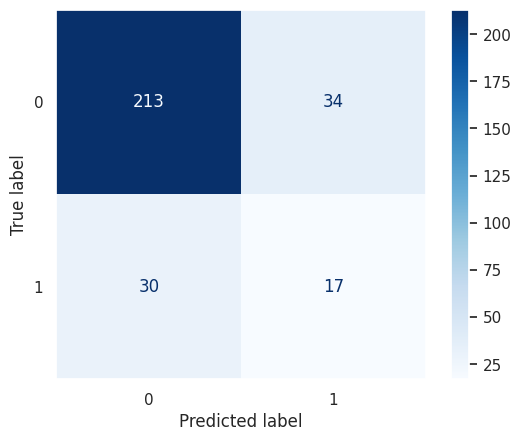

In [ ]:
print(classification_report(y_test, dt_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_pred, cmap="Blues");
plt.grid(False)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_fscore = f1_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)

##SVM

In [ ]:
svm_model = make_pipeline(StandardScaler(), LinearSVC(random_state = 0, C = 0.8))
svm_model.fit(X_train_scaled, y_smote)

In [ ]:
svm_y_pred = svm_model.predict(X_test_scaled )

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.51      0.51      0.51        47

    accuracy                           0.84       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.84      0.84      0.84       294



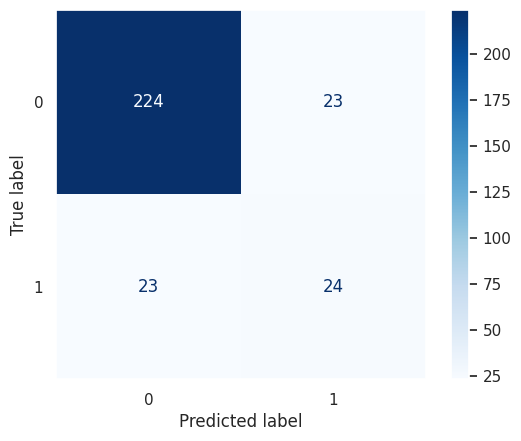

In [ ]:
print(classification_report(y_test, svm_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, cmap='Blues');
plt.grid(False);
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_fscore = f1_score(y_test, svm_y_pred )
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)

##Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=0, max_iter = 1000)
lr_model.fit(X_train_scaled,y_smote )

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
lr_y_pred = lr_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       247
           1       0.50      0.51      0.51        47

    accuracy                           0.84       294
   macro avg       0.70      0.71      0.70       294
weighted avg       0.84      0.84      0.84       294



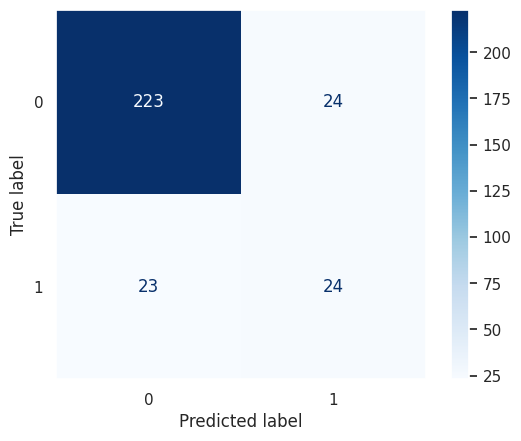

In [ ]:
print(classification_report(y_test, lr_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, cmap='Blues');
plt.grid(False);
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_fscore = f1_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)

##ADABOOST

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
ada_y_pred = ada_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.62      0.38      0.47        47

    accuracy                           0.86       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294



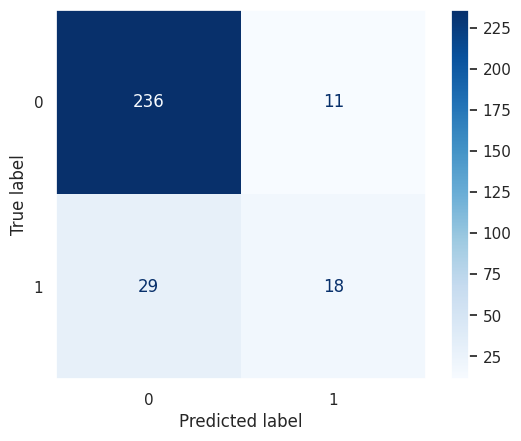

In [ ]:
print(classification_report(y_test,ada_y_pred))
#ada_fscore = f1_score(y_test, ada_y_pred,pos_label='Yes')
ConfusionMatrixDisplay.from_predictions(y_test, ada_y_pred, cmap='Blues');
plt.grid(False)
ada_accuracy = accuracy_score(y_test, lr_y_pred)
ada_fscore = f1_score(y_test, ada_y_pred)
ada_precision = precision_score(y_test, lr_y_pred)
ada_recall = recall_score(y_test, lr_y_pred)

##XGBoost

In [ ]:
xgb_model = XGBClassifier(n_estimators=55, learning_rate=0.3, objective='binary:logistic')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=55, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.89      0.17      0.29        47

    accuracy                           0.86       294
   macro avg       0.88      0.58      0.61       294
weighted avg       0.87      0.86      0.82       294



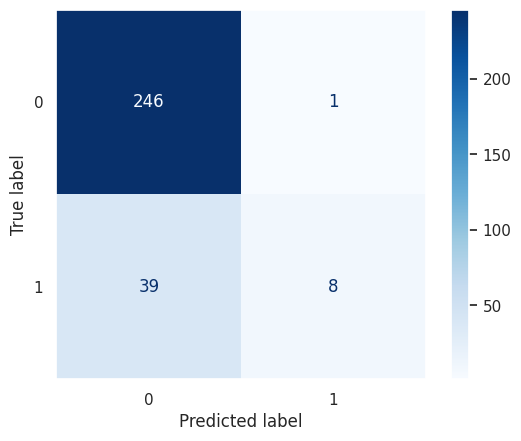

In [ ]:
print(classification_report(y_test,xgb_y_pred))
xgb_fscore = f1_score(y_test, xgb_y_pred )
ConfusionMatrixDisplay.from_predictions(y_test, xgb_y_pred, cmap='Blues');
plt.grid(False)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)

##Summary of Results

In [ ]:
summary_1 = {
    'Models': ['Random Forest', 'Decision Tree', 'Support Vector Machine', 'Logistic Regression','AdaBoost','XGBoost'],
    'accuracy  Score':[rf_accuracy , dt_accuracy , svm_accuracy ,lr_accuracy , ada_accuracy,xgb_accuracy ],
    'F1 Score': [rf_fscore, dt_fscore, svm_fscore,lr_fscore, ada_fscore,xgb_fscore],
    'Percision Score':[rf_precision, dt_precision, svm_precision,lr_precision, ada_precision,xgb_precision],
    'recall Score':[rf_recall , dt_recall , svm_recall ,lr_recall , ada_recall,xgb_recall ],
             }

df_summary_1 = pd.DataFrame(summary_1)
df_summary_1

,Models,accuracy Score,F1 Score,Percision Score,recall Score
0,Random Forest,0.857143,0.192308,1.000000,0.106383
1,Decision Tree,0.782313,0.346939,0.333333,0.361702
2,Support Vector Machine,0.843537,0.510638,0.510638,0.510638
3,Logistic Regression,0.840136,0.505263,0.500000,0.510638
4,AdaBoost,0.840136,0.473684,0.500000,0.510638
5,XGBoost,0.863946,0.285714,0.888889,0.170213


##Adasyn

####Rf with Adasyn

In [ ]:
from imblearn.over_sampling import ADASYN
# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_adysin,y_adysin= adasyn.fit_resample(X,y )

In [ ]:
X_adysin.shape

(2406, 34)

In [ ]:
y_adysin.shape

(2406,)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Instantiate the decision tree model
model_randomforeset =RandomForestClassifier(random_state=42)
# Define the number of folds for cross-validation
k = 10
# Perform k-fold cross-validation
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
# Perform k-fold cross-validation and calculate accuracy and F1 score
accuracy_scores = cross_val_score(model_randomforeset, X_adysin,y_adysin, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(model_randomforeset, X_adysin,y_adysin, cv=skf, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean CV Accuracy Score:", np.mean(accuracy_scores))
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean CV F1 Score:", np.mean(f1_scores))

Cross-Validation Accuracy Scores: [0.87966805 0.94190871 0.92946058 0.93775934 0.90041494 0.89626556
 0.9375     0.9125     0.90833333 0.90416667]
Mean CV Accuracy Score: 0.9147977178423238
Cross-Validation F1 Scores: [0.87659574 0.94117647 0.92444444 0.9339207  0.89285714 0.89361702
 0.93506494 0.90909091 0.89908257 0.89956332]
Mean CV F1 Score: 0.9105413260433561


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1233
           1       0.93      0.89      0.91      1173

    accuracy                           0.91      2406
   macro avg       0.92      0.91      0.91      2406
weighted avg       0.92      0.91      0.91      2406



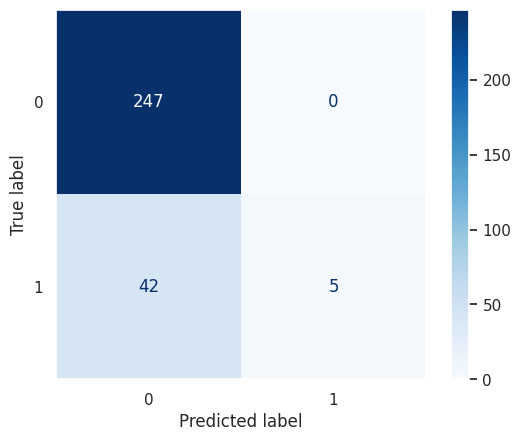

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
# Perform k-fold cross-validation and generate predictions
y_pred_cv = cross_val_predict(model_randomforeset, X_adysin, y_adysin, cv=skf)

# Generate the classification report
class_report_cv = classification_report(y_adysin, y_pred_cv)
print(class_report_cv)
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, cmap='Blues')
plt.grid(False)
rf_accuracy2 = accuracy_score(y_test, rf_y_pred)
rf_fscore2 = f1_score(y_test, rf_y_pred)
rf_precision2 = precision_score(y_test, rf_y_pred)
rf_recall2 = recall_score(y_test, rf_y_pred)

#### DT with Adasyn

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Instantiate the decision tree model
model = DecisionTreeClassifier(random_state=42)

# Define the number of folds for cross-validation
k =10

# Perform stratified k-fold cross-validation and calculate accuracy and F1 score
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores_stratified = cross_val_score(model, X_adysin, y_adysin, cv=skf, scoring='accuracy')
f1_scores_stratified = cross_val_score(model, X_adysin, y_adysin, cv=skf, scoring='f1')


              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1233
           1       0.78      0.82      0.80      1173

    accuracy                           0.80      2406
   macro avg       0.80      0.80      0.80      2406
weighted avg       0.80      0.80      0.80      2406



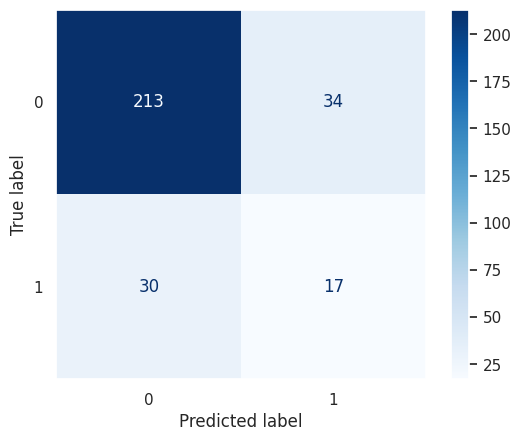

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Perform k-fold cross-validation and generate predictions
y_pred_cv = cross_val_predict(model, X_adysin, y_adysin, cv=skf)

# Generate the classification report
class_report_cv = classification_report(y_adysin, y_pred_cv)
print(class_report_cv)
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_pred, cmap="Blues");
plt.grid(False)
dt_accuracy2 = accuracy_score(y_test, dt_y_pred)
dt_fscore2 = f1_score(y_test, dt_y_pred)
dt_precision2 = precision_score(y_test, dt_y_pred)
dt_recall2 = recall_score(y_test, dt_y_pred)

####SVM with Adasyn

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# Instantiate the SVM model
model = SVC(random_state=42)

# Define the number of folds for cross-validation
k = 10

# Perform stratified k-fold cross-validation and calculate accuracy and F1 score
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores_stratified = cross_val_score(model, X_adysin, y_adysin, cv=skf, scoring='accuracy')
f1_scores_stratified = cross_val_score(model, X_adysin, y_adysin, cv=skf, scoring='f1')


              precision    recall  f1-score   support

           0       0.61      0.47      0.53      1233
           1       0.55      0.68      0.61      1173

    accuracy                           0.57      2406
   macro avg       0.58      0.58      0.57      2406
weighted avg       0.58      0.57      0.57      2406



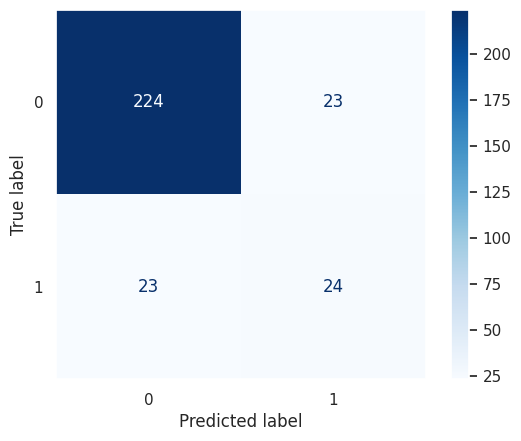

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
# Create an SVM model
svm_model = SVC()
# Perform k-fold cross-validation and generate predictions
y_pred_cv_svm = cross_val_predict(svm_model, X_adysin, y_adysin, cv=StratifiedKFold())
# Generate the classification report
class_report_cv_svm = classification_report(y_adysin, y_pred_cv_svm)
print(class_report_cv_svm)
ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, cmap='Blues');
plt.grid(False);
svm_accuracy2 = accuracy_score(y_test, svm_y_pred)
svm_fscore2 = f1_score(y_test, svm_y_pred )
svm_precision2 = precision_score(y_test, svm_y_pred)
svm_recall2 = recall_score(y_test, svm_y_pred)

####Lg with Adasyn

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np
# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)
# Define the number of folds for cross-validation
k = 10
# Perform stratified k-fold cross-validation and calculate accuracy and F1 score
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores_stratified = cross_val_score(model, X_adysin, y_adysin, cv=skf, scoring='accuracy')
f1_scores_stratified = cross_val_score(model, X_adysin, y_adysin, cv=skf, scoring='f1')

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)
# Define the number of folds for cross-validation
k = 10
# Perform stratified k-fold cross-validation and generate predictions
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X_adysin, y_adysin, cv=skf)
# Generate the classification report
class_report_cv = classification_report(y_adysin, y_pred_cv)
print(class_report_cv)
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, cmap='Blues');
plt.grid(False);
lr_accuracy2 = accuracy_score(y_test, lr_y_pred)
lr_fscore2 = f1_score(y_test, lr_y_pred)
lr_precision2 = precision_score(y_test, lr_y_pred)
lr_recall2 = recall_score(y_test, lr_y_pred)

####ADa with Adasyn

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
# Define the number of folds for cross-validation
k =10
# Perform k-fold cross-validation
skf = StratifiedKFold(n_splits=k)
# Perform k-fold cross-validation and calculate accuracy and F1 score
accuracy_scores = cross_val_score(ada_model, X_adysin,y_adysin, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(ada_model, X_adysin,y_adysin, cv=skf, scoring='f1')


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1233
           1       0.85      0.87      0.86      1173

    accuracy                           0.86      2406
   macro avg       0.86      0.86      0.86      2406
weighted avg       0.86      0.86      0.86      2406



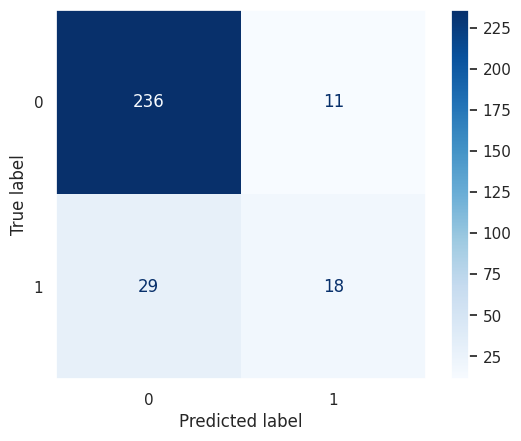

In [ ]:
# Instantiate the AdaBoost model
model = AdaBoostClassifier(random_state=42)
# Define the number of folds for cross-validation
k = 10
# Perform stratified k-fold cross-validation and generate predictions
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X_adysin, y_adysin, cv=skf)
# Generate the classification report
class_report_cv = classification_report(y_adysin, y_pred_cv)
print(class_report_cv)
ConfusionMatrixDisplay.from_predictions(y_test, ada_y_pred, cmap='Blues');
plt.grid(False)
ada_accuracy2 = accuracy_score(y_test, lr_y_pred)
ada_fscore2 = f1_score(y_test, ada_y_pred)
ada_precision2 = precision_score(y_test, lr_y_pred)
ada_recall2 = recall_score(y_test, lr_y_pred)

####XGB with Adasyn

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
xgb_model = XGBClassifier()

# Define the number of folds for cross-validation
k =10
# Perform k-fold cross-validation
skf = StratifiedKFold(n_splits=k)

# Perform k-fold cross-validation and calculate accuracy and F1 score
accuracy_scores = cross_val_score(xgb_model, X_adysin,y_adysin, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(xgb_model, X_adysin,y_adysin, cv=skf, scoring='f1')

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1233
           1       0.82      0.88      0.85      1173

    accuracy                           0.84      2406
   macro avg       0.85      0.85      0.84      2406
weighted avg       0.85      0.84      0.84      2406



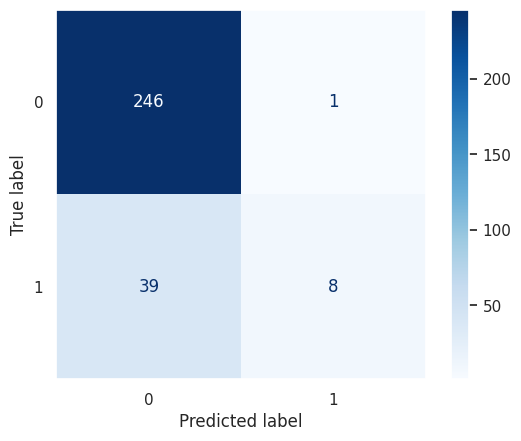

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Perform k-fold cross-validation and generate predictions
y_pred_cv = cross_val_predict(xgb_model, X_adysin, y_adysin, cv=skf)
# Generate the classification report
class_report_cv = classification_report(y_adysin, y_pred_cv)
print(class_report_cv)
xgb_fscore2 = f1_score(y_test, xgb_y_pred )
ConfusionMatrixDisplay.from_predictions(y_test, xgb_y_pred, cmap='Blues');
plt.grid(False)
xgb_accuracy2 = accuracy_score(y_test, xgb_y_pred)
xgb_precision2 = precision_score(y_test, xgb_y_pred)
xgb_recall2 = recall_score(y_test, xgb_y_pred)